<a href="https://colab.research.google.com/github/sushmaasree/Assignments-LMS-/blob/main/Day28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Extracted emails: ['support@example.com', 'sales@example.org']
Webpage title: Example Domain


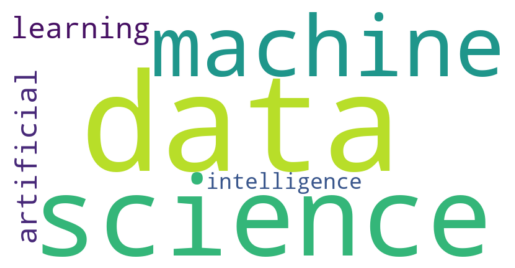

WordCloud saved as 'wordcloud_output.png'

Part-of-Speech Tagging:
NLP: PROPN (NNP)
is: AUX (VBZ)
amazing: ADJ (JJ)
and: CCONJ (CC)
fun: ADJ (JJ)
to: PART (TO)
learn: VERB (VB)
.: PUNCT (.)
Cosine Similarity: 0.2202881505618297

Named Entities and Types:
Google: ORG
September 1998: DATE
Larry Page: PERSON
Sergey Brin: PERSON
Ph.D.: WORK_OF_ART
Stanford University: ORG
California: GPE


In [1]:
import re
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Ensure NLTK resources are available
nltk.download('punkt')

# Extract emails from text
def extract_emails(text: str) -> list:
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    return re.findall(email_pattern, text)

# Test email extraction
test_input = "Contact us at support@example.com and sales@example.org."
print("Extracted emails:", extract_emails(test_input))

# Fetch and print webpage title
def fetch_webpage_title(url: str) -> str:
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup.title.string.strip() if soup.title else "No title found"
    except Exception as e:
        return f"Error: {e}"

# Test title fetching
test_url = "https://example.com"
print("Webpage title:", fetch_webpage_title(test_url))

# Generate WordCloud and save as image
def generate_wordcloud(text: str, output_file: str):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    wordcloud.to_file(output_file)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Test WordCloud generation
text_content = "data science machine learning artificial intelligence"
output_image_path = "wordcloud_output.png"
generate_wordcloud(text_content, output_image_path)
print(f"WordCloud saved as '{output_image_path}'")

# Perform part-of-speech tagging using SpaCy
def pos_tagging(text: str):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    for token in doc:
        print(f"{token.text}: {token.pos_} ({token.tag_})")

# Test part-of-speech tagging
test_sentence = "NLP is amazing and fun to learn."
print("\nPart-of-Speech Tagging:")
pos_tagging(test_sentence)

# Perform EDA for text data using NLTK
def text_eda(filepath: str):
    """Load text file, tokenize, and display 10 most common words."""
    try:
        with open(filepath, 'r') as file:
            text = file.read()
        tokens = word_tokenize(text.lower())
        freq_dist = FreqDist(tokens)
        most_common_words = freq_dist.most_common(10)
        print("\n10 Most Common Words:")
        for word, count in most_common_words:
            print(f"{word}: {count}")
    except FileNotFoundError:
        print("File not found.")

# Example usage (assuming text file 'sample_text.txt')
# text_eda("sample_text.txt")

# Calculate cosine similarity between two strings
def calculate_cosine_similarity(text1: str, text2: str) -> float:
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return similarity[0][0]

# Test cosine similarity calculation
string1 = "Machine learning is fascinating."
string2 = "Artificial intelligence and machine learning are related fields."
similarity_score = calculate_cosine_similarity(string1, string2)
print(f"Cosine Similarity: {similarity_score}")

# Perform Named Entity Recognition (NER) using SpaCy
def named_entity_recognition(text: str):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    print("\nNamed Entities and Types:")
    for ent in doc.ents:
        print(f"{ent.text}: {ent.label_}")

# Test NER
ner_test_text = "Google was founded in September 1998 by Larry Page and Sergey Brin while they were Ph.D. students at Stanford University in California."
named_entity_recognition(ner_test_text)
